In [1]:
from keras import applications
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense, Rescaling
from keras import backend as k 
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

data_dir = 'labeled_data'


train_ds = tf.keras.utils.image_dataset_from_directory(
                                                        data_dir,
                                                        validation_split=0.2,
                                                        subset="training",
                                                        seed=123,
                                                        image_size=IMG_SIZE,
                                                        batch_size=BATCH_SIZE)

valid_ds = tf.keras.utils.image_dataset_from_directory(
                                                        data_dir,
                                                        validation_split=0.2,
                                                        subset="validation",
                                                        seed=123,
                                                        image_size=IMG_SIZE,
                                                        batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print(class_names)




Found 334 files belonging to 2 classes.
Using 268 files for training.
Found 334 files belonging to 2 classes.
Using 66 files for validation.
['no_scams', 'scams']


In [3]:
vgg = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
# mark loaded layers as not trainable
for layer in vgg.layers:
	layer.trainable = False

In [4]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=(*IMG_SIZE, 3)))
model.add(vgg)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 16,320,514
Trainable params: 1,605,826
Non

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=5
)

Epoch 1/5
9/9 [==============================] - 126s 13s/step - loss: 1.7035 - accuracy: 0.5896 - val_loss: 0.5846 - val_accuracy: 0.7121
Epoch 2/5
9/9 [==============================] - 119s 13s/step - loss: 0.6577 - accuracy: 0.7799 - val_loss: 0.4230 - val_accuracy: 0.7727
Epoch 3/5
9/9 [==============================] - 119s 13s/step - loss: 0.2676 - accuracy: 0.8619 - val_loss: 0.3483 - val_accuracy: 0.9091
Epoch 4/5
9/9 [==============================] - 120s 13s/step - loss: 0.2209 - accuracy: 0.8955 - val_loss: 0.3468 - val_accuracy: 0.8788
Epoch 5/5
9/9 [==============================] - 119s 13s/step - loss: 0.1711 - accuracy: 0.8993 - val_loss: 0.3188 - val_accuracy: 0.8939


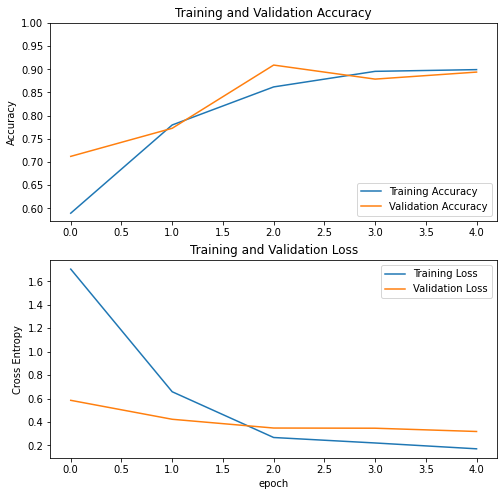

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [60]:
model.save('model')